In [8]:
cd ../utilities/

/home/gustav/Documents/DD142X/code/utilities


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from h5py import File

In [9]:
cd ../_data/matlabData

/home/gustav/Documents/DD142X/code/_data/matlabData


In [61]:
files = !ls
print(files)

['NPR040.c12.mat', 'NPR040.d12.mat', 'NPR052d.05.mat', 'NPR052e.10.mat', 'NPR064.b08.mat', 'NPR064.c09.mat', 'NPR065c.10.mat', 'NPR065e.03.mat', 'NPR-073.d04.mat', 'NPR-073.d08.mat', 'NPR-075.b11.mat', 'NPR-075.b13.mat', 'NPR-075.c013.mat', 'NPR-075.c08.mat', 'NPR-075.d07.mat', 'NPR-076.b05.mat', 'NPR-076.b09.mat', 'NPR-076.c09.mat', 'NPR-076.d07.mat', 'pjx289c.01.mat', 'pjx289e08.mat']


In [65]:
filesBoth = []
for fl in files:
    with File(fl, 'r') as tmpMat:
        foundStr = False
        foundGp  = False
        for k in tmpMat.keys():
            if "str_lfp" in k:
                foundStr = True
            if "gp_lfp" in k:
                foundGp = True
        if foundStr and foundGp:
            filesBoth.append(fl)
print(filesBoth)

['NPR040.d12.mat', 'NPR052e.10.mat', 'NPR064.b08.mat', 'NPR064.c09.mat', 'NPR065c.10.mat', 'NPR065e.03.mat', 'NPR-073.d04.mat', 'NPR-073.d08.mat', 'NPR-075.b11.mat', 'NPR-075.b13.mat', 'NPR-075.c013.mat', 'NPR-075.c08.mat', 'NPR-075.d07.mat', 'NPR-076.b05.mat', 'NPR-076.b09.mat', 'NPR-076.c09.mat', 'NPR-076.d07.mat', 'pjx289c.01.mat', 'pjx289e08.mat']


In [70]:
with File("NPR052e.10.mat", 'r') as ml:
    gp_  = np.array(ml[  "gp_lfp1"]["values"]).flatten()
    str_ = np.array(ml["str_lfp14"]["values"]).flatten()
f1 = ("NPR052e.10.mat", gp_, "gp_lfp1", str_, "str_lfp14")

In [72]:
with File("NPR064.b08.mat", "r") as ml:
    gp_  = np.array(ml[  "gp_lfp1"]["values"]).flatten()
    str_ = np.array(ml["str_lfp10"]["values"]).flatten()
f2 = ("NPR064.b08.mat", gp_, "gp_lfp1", str_, "str_lfp10")

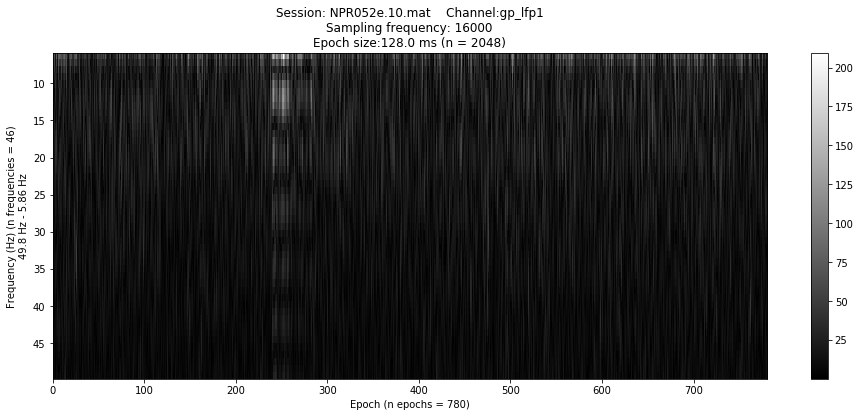

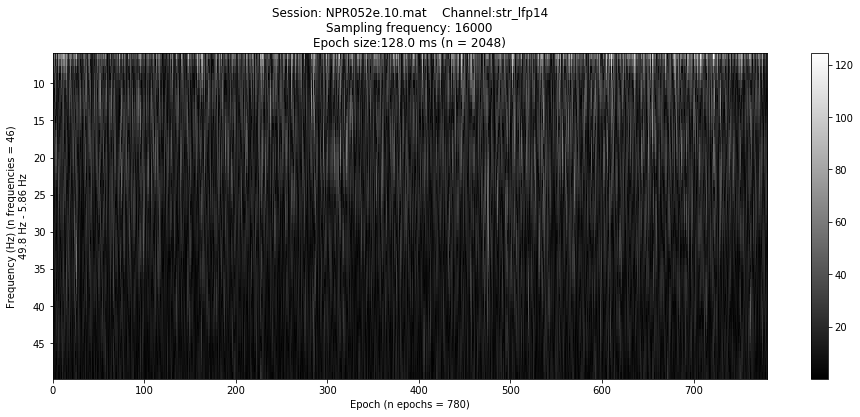

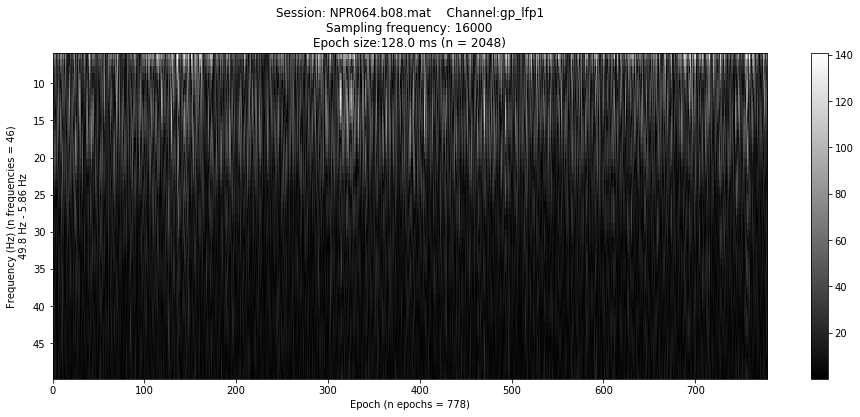

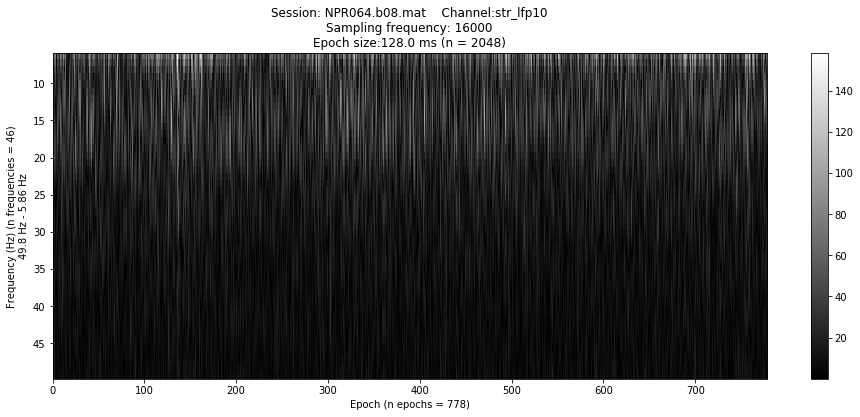

In [109]:
def execute(
    animal,
    channel,
    vals_in,
    Fs = 16000,
    epsz = 2 ** 11,
    fft_n = 2 ** 14,
    lof = 5,
    hif = 50,
    save = False
):
    epochs = int(vals_in.shape[0] / epsz)
    vals = vals_in.copy()[ : epochs * epsz]
    vals = vals.reshape((epochs, -1))
    
    freq = np.fft.fftfreq(fft_n, 1./Fs)
    ffts = np.fft.fft(vals, fft_n)
    freqIdx = ((freq >= lof) & (freq <= hif))
    freq = freq[freqIdx]
    ffts = np.abs(ffts[ : , freqIdx])
    
    plt.figure(figsize = (16, 6))
    plt.imshow(
        ffts.transpose(), 
        aspect = 'auto', 
        cmap = 'gray',
        extent = [
            0, epochs,
            np.max(freq), np.min(freq)
        ]
    )
    plt.colorbar()
    plt.title(
        f"Session: {animal}    Channel:{channel}\nSampling frequency: {Fs}\n" + \
        f"Epoch size:{round(epsz * 1000 / Fs, 2)} ms (n = {epsz})"  
    )
    plt.xlabel(f"Epoch (n epochs = {epochs})")
    plt.ylabel(
        f"Frequency (Hz) (n frequencies = {freq.shape[0]})\n" + \
        f"{round(np.max(freq), 2)} Hz - {round(np.min(freq), 2)} Hz"
    )
    if save:
        plt.savefig(f"../production/forFFVkex/{animal}.{channel}.png")
    plt.show()
    
for tup in [f1, f2]:
    animal, vals1, channel1, vals2, channel2 = tup
    for ch, vl in [(channel1, vals1), (channel2, vals2)]:
        execute(animal, ch, vl, fft_n = 2**14, epsz = 2**11)

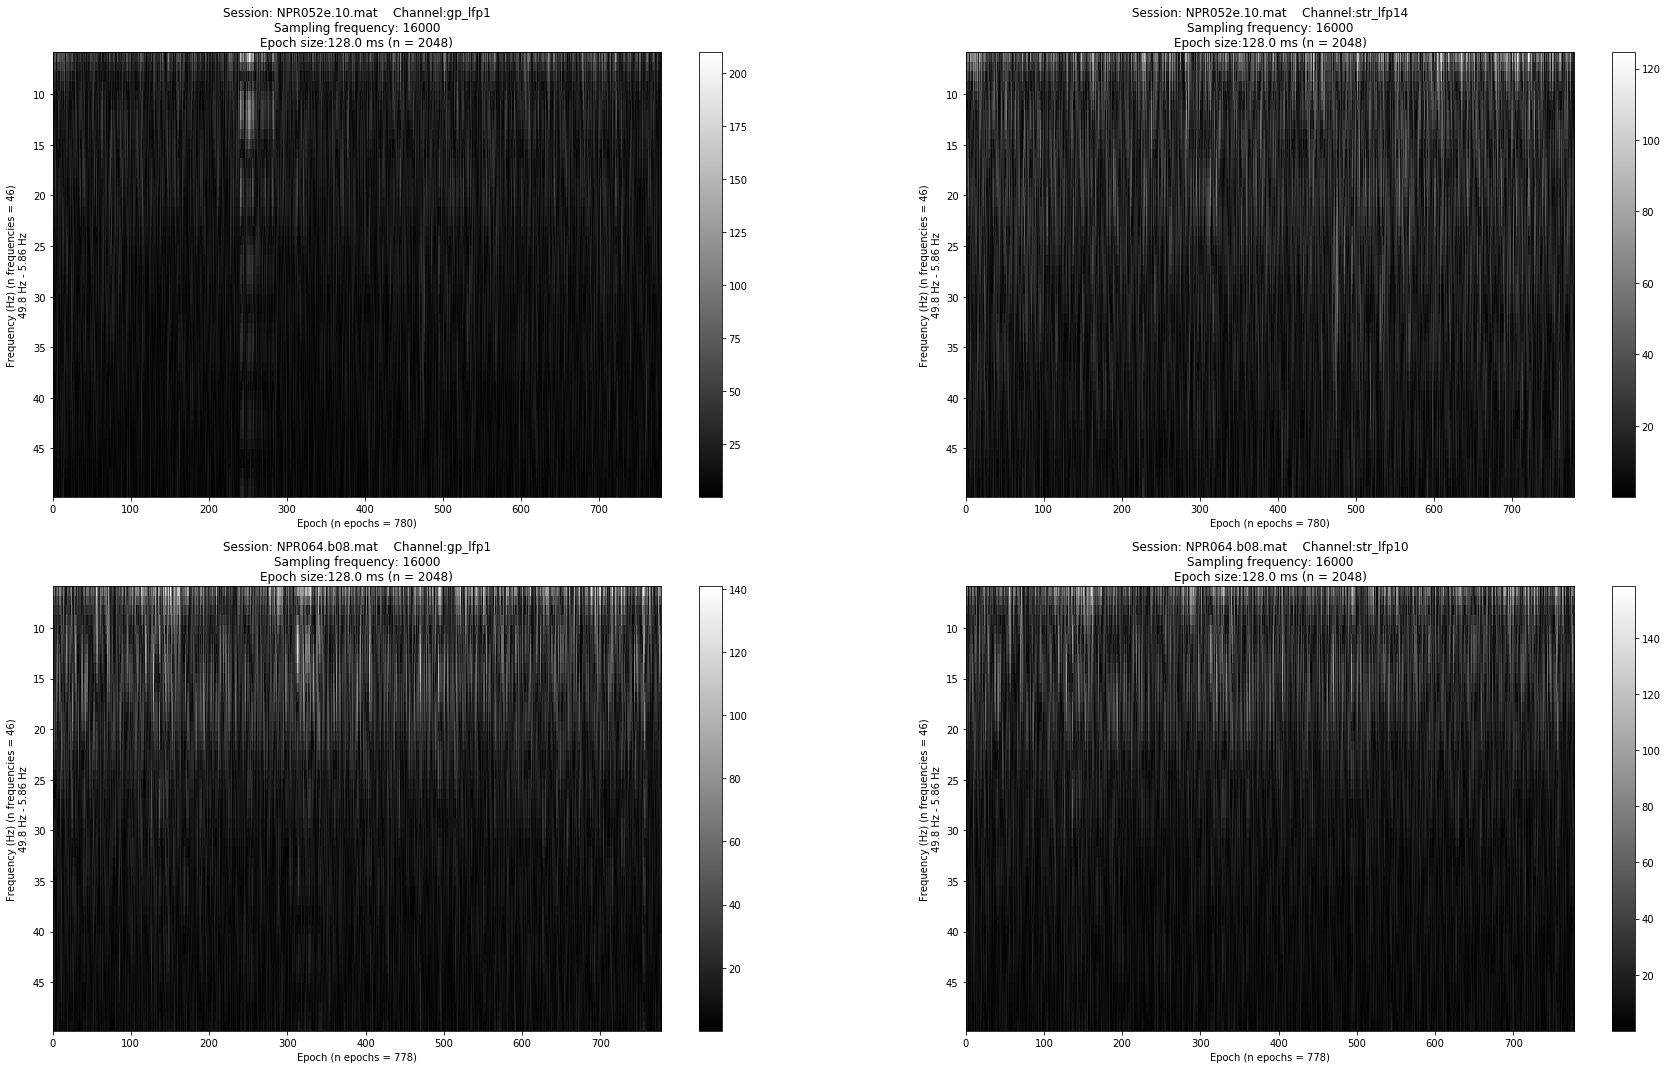

In [96]:
def execute(
    animal,
    channel,
    vals_in,
    Fs = 16000,
    epsz = 2 ** 11,
    fft_n = 2 ** 14,
    lof = 5,
    hif = 50,
    i = -1
):
    epochs = int(vals_in.shape[0] / epsz)
    vals = vals_in.copy()[ : epochs * epsz]
    vals = vals.reshape((epochs, -1))
    
    freq = np.fft.fftfreq(fft_n, 1./Fs)
    ffts = np.fft.fft(vals, fft_n)
    freqIdx = ((freq >= lof) & (freq <= hif))
    freq = freq[freqIdx]
    ffts = np.abs(ffts[ : , freqIdx])
    
    plt.subplot(2, 2, i)
    plt.imshow(
        ffts.transpose(), 
        aspect = 'auto', 
        cmap = 'gray',
        extent = [
            0, epochs,
            np.max(freq), np.min(freq)
        ]
    )
    plt.colorbar()
    plt.title(
        f"Session: {animal}    Channel:{channel}\nSampling frequency: {Fs}\n" + \
        f"Epoch size:{round(epsz * 1000 / Fs, 2)} ms (n = {epsz})"  
    )
    plt.xlabel(f"Epoch (n epochs = {epochs})")
    plt.ylabel(
        f"Frequency (Hz) (n frequencies = {freq.shape[0]})\n" + \
        f"{round(np.max(freq), 2)} Hz - {round(np.min(freq), 2)} Hz"
    )
    
i = 1
plt.figure(figsize = (30, 18))
for tup in [f1, f2]:
    animal, vals1, channel1, vals2, channel2 = tup
    execute(animal, channel1, vals1, i = i)
    i += 1
    execute(animal, channel2, vals2, i = i)
    i += 1
plt.savefig(f"../production/forFFVkex/all.png")
plt.show()